## Basic Image Info (Metrics)

| Metric                              | Description                                                                                                               | Example                                                      | Interpretation                                                                                      |
|-------------------------------------|---------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| ✅ **1. File Size**                    | The size of the image file in bytes.                                                                                      | `File Size: 204800 bytes`                                    | Indicates the storage space the image file occupies. Larger file sizes may imply higher resolution or less compression. |
| ✅ **2. Aspect Ratio**                 | The ratio of the width to the height of the image, stored as a vector.                                                    | `Aspect Ratio: (1920, 1080)`                                 | Helps in understanding the shape of the image (e.g., wide, tall, square). Represented as a tuple of width and height.   |
| **3. Width**                        | The width of the image in pixels.                                                                                         | `Width: 1920 pixels`                                         |                                                                                                    |
| **4. Height**                       | The height of the image in pixels.                                                                                        | `Height: 1080 pixels`                                        |                                                                                                    |
| ✅ **5. Total Pixels**                 | The total number of pixels in the image, calculated as the product of width and height.                                  | `Total Pixels: 2073600`                                      | Indicates the overall resolution and level of detail in the image.                                     |
| ✅ **6. Color Mode**                   | The color mode of the image (e.g., RGB, CMYK).                                                                            | `Color Mode: RGB`                                            | Different color modes are used for different purposes. RGB is common for digital images, while CMYK is used for printing. |
| **7. Bit Depth**                    | The bit depth of the image, indicating the number of bits used to represent each color channel.                           | `Bit Depth: 8-bit`                                           | Higher bit depths allow for more colors and greater detail. An 8-bit image can display 256 colors per channel.           |
| **8. Number of Unique Colors**      | The total number of unique colors in the image.                                                                           | `Unique Colors: 1024`                                        | A higher number of unique colors can indicate a more complex and detailed image.                    |
| 🧠 **9. Dominant Colors**              | The most prevalent colors in the image, often determined through clustering algorithms like KMeans.                       | `Dominant Colors: [(255, 0, 0), (0, 255, 0), (0, 0, 255)]`   | Useful for understanding the image's overall color palette.                                         |
| **10. Metadata**                    | Additional information embedded in the image, such as camera model, exposure settings, and date taken.                    | `Metadata: {'Camera': 'Nikon D3500', 'Exposure': '1/60', 'Date Taken': '2021-05-15'}` | Provides context about how and when the image was captured.                                         |
| **11. Compression Type**            | The type of compression used to store the image (e.g., JPEG, PNG).                                                        | `Compression Type: JPEG`                                     | Different compression types have different impacts on image quality and file size. JPEG is lossy, while PNG is lossless. |
| **12. Image Format**                | The file format of the image (e.g., JPEG, PNG).                                                                           | `Image Format: JPEG`                                         |                                                                                                    |
| **13. 🧠 Mean and Standard Deviation of Color Channels** | Statistical measures of the color channels in the image.                                                                 | `Mean Color Channels: [123.4, 135.6, 145.7]`                 | The mean gives the average color value, while the standard deviation indicates the variation in color. |
| **14. 🧠 Histogram of Color Channels** | A histogram representing the distribution of color values in the image.                                                   | `Histogram: [0, 5, 13, ..., 2]`                              | Helps visualize the spread and intensity of colors in the image.                                    |
| **15. Presence of Alpha Channel**   | Indicates whether the image has an alpha (transparency) channel.                                                          | `Alpha Channel: True`                                        | An alpha channel allows for transparency in the image.                                              |
| **16. Entropy**                     | A measure of randomness or complexity in the image.                                                                       | `Entropy: 7.85`                                              | Higher entropy values suggest more complexity and detail in the image.                              |
| **17. Brightness**                  | The average brightness of the image.                                                                                      | `Brightness: 120.5`                                          | Higher values indicate a brighter image.                                                           |
| **18. Contrast**                    | The difference between the darkest and lightest parts of the image.                                                       | `Contrast: 45.3`                                             | Higher contrast values indicate a greater difference between light and dark areas, making the image appear more vivid.  |
| **19. Sharpness**                   | A measure of the clarity of edges in the image.                                                                           | `Sharpness: 1500.0`                                          | Higher sharpness values indicate clearer, more defined edges in the image.                          |
| **20. Texture**                     | The perceived surface quality or feel of the image (e.g., smoothness, roughness).                                         | `Texture: High smoothness`                                   | Texture analysis can be used in various applications such as material identification and image segmentation.            |
| **21. Geometric Features**          | Features related to the shapes and structures within the image (e.g., number of edges, contours).                         | `Geometric Features: 500 edges detected`                     | Helps in understanding the structural elements of the image, useful in object recognition.           |
| **22. Saturation**                  | The intensity of colors in the image.                                                                                     | `Saturation: 70.0`                                           | Higher saturation values indicate more intense and vivid colors.                                     |

By analyzing these metrics, we can gain a comprehensive understanding of the image's properties and characteristics, enabling better organization, search, and utilization in various applications.


In [176]:
# Image
image_path = './images/dove.png'

In [177]:
from PIL import Image, ImageStat
import os
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import cv2
from math import gcd

def get_image_info(image_path):
    # Open the image
    image = Image.open(image_path)
    
    # Basic Info
    file_size = os.path.getsize(image_path)
    width, height = image.size
    
    # Reduce aspect ratio to simplest form
    def reduce_aspect_ratio(width, height):
        divisor = gcd(width, height)
        return (width // divisor, height // divisor)
    
    aspect_ratio = reduce_aspect_ratio(width, height)
    
    color_mode = image.mode
    format = image.format
    bit_depth = image.mode  # Bit depth inferred from mode
    
    # Total Pixels
    total_pixels = width * height
    
    # Unique Colors
    unique_colors = len(image.getcolors(image.size[0] * image.size[1]))
    
    # Image Histogram
    histogram = image.histogram()
    
    # Dominant Colors
    def get_dominant_colors(image, k=5):
        image = image.convert('RGB')
        image_np = np.array(image)
        pixels = image_np.reshape(-1, 3)
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pixels)
        colors = kmeans.cluster_centers_
        counts = Counter(kmeans.labels_)
        dominant_colors = colors[np.argsort(-np.array(list(counts.values())))]
        return dominant_colors
    
    dominant_colors = get_dominant_colors(image)
    
    # Mean and Standard Deviation of Color Channels
    stat = ImageStat.Stat(image)
    mean = stat.mean
    stddev = stat.stddev
    
    # Entropy
    entropy = image.entropy()
    
    # Brightness
    grayscale = image.convert('L')
    brightness = ImageStat.Stat(grayscale).mean[0]
    
    # Contrast
    contrast = ImageStat.Stat(grayscale).stddev[0]
    
    # Presence of Alpha Channel
    alpha_channel = 'A' in image.mode
    
    # Additional features using OpenCV
    image_cv = cv2.imread(image_path)
    sharpness = cv2.Laplacian(image_cv, cv2.CV_64F).var()
    
    info = {
        'File Size': file_size,
        'Width': width,
        'Height': height,
        'Aspect Ratio': aspect_ratio,
        'Color Mode': color_mode,
        'Format': format,
        'Bit Depth': bit_depth,
        'Total_Pixels': total_pixels,
        'Unique Colors': unique_colors,
        'Dominant Colors': dominant_colors.tolist(),
        'Mean Color Channels': mean,
        'Stddev Color Channels': stddev,
        'Entropy': entropy,
        'Brightness': brightness,
        'Contrast': contrast,
        'Alpha Channel': alpha_channel,
        'Sharpness': sharpness,
        'Path': image_path
    }
    
    return info

# Example usage
image_info = get_image_info(image_path)
for key, value in image_info.items():
    print(f'{key}: {value}')


File Size: 2224114
Width: 928
Height: 1312
Aspect Ratio: (29, 41)
Color Mode: RGB
Format: PNG
Bit Depth: RGB
Total_Pixels: 1217536
Unique Colors: 720560
Dominant Colors: [[196.39949674549717, 91.95340944541346, 32.5913822863164], [184.32940181576248, 184.1929720828917, 187.21516206771497], [45.08376910297844, 50.50310105800024, 47.694059345739504], [63.271826718790635, 128.4902811346566, 143.67304540657136], [184.47591103769966, 157.0448589617494, 140.5978440864379]]
Mean Color Channels: [143.73099111648443, 128.58500775336418, 115.86749796309924]
Stddev Color Channels: [71.73283983531948, 60.32995291215878, 67.2109409715375]
Entropy: 9.056800149358939
Brightness: 131.6639877588835
Contrast: 52.108683804978256
Alpha Channel: False
Sharpness: 1556.3501502766192
Path: ./images/dove.png


## Visualize Aspect Ratio

### Description

The `showAR` function visualizes different aspect ratios by displaying a reference blue square (1:1 aspect ratio) and a red rectangle representing the provided aspect ratio. Both shapes are centered on the plot to ensure clear and accurate comparison.

### How It Works

1. **Aspect Ratio Reduction**: The aspect ratio is reduced to its simplest form using the greatest common divisor (GCD).
2. **Plot Creation**: A plot is created with Matplotlib, and both the reference square and the aspect ratio rectangle are defined and centered on the plot.
3. **Normalization**: The aspect ratio is normalized to fit within the plot size while maintaining its proportions.
4. **Legend**: A legend is added to label the reference square and the aspect ratio rectangle.

### Output

The function displays a plot with:
- A centered blue square representing a 1:1 aspect ratio.
- A centered red rectangle representing the specified aspect ratio, reduced to its simplest form.
- A legend indicating which shape corresponds to which aspect ratio.

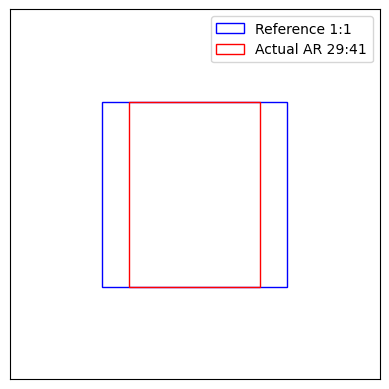

In [178]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from math import gcd

def reduce_aspect_ratio(width, height):
    divisor = gcd(width, height)
    return (width // divisor, height // divisor)

def visualize_ar(aspect_ratio):
    # Reduce the aspect ratio to its simplest form
    width, height = reduce_aspect_ratio(*aspect_ratio)

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Define the size of the red square
    square_size = 1
    square_x = (2 - square_size) / 2
    square_y = (2 - square_size) / 2
    square = plt.Rectangle((square_x, square_y), square_size, square_size, fill=None, edgecolor='b', label='Reference 1:1')

    # Add the red square to the plot
    ax.add_patch(square)

    # Normalize the aspect ratio to fit within the plot size
    aspect_ratio_max = max(width, height)
    normalized_width = width / aspect_ratio_max
    normalized_height = height / aspect_ratio_max

    # Calculate position to keep it centered
    rect_x = (2 - normalized_width) / 2
    rect_y = (2 - normalized_height) / 2
    aspect_rect = plt.Rectangle((rect_x, rect_y), normalized_width, normalized_height, fill=None, edgecolor='r', label=f'Actual AR {width}:{height}')

    # Add the aspect ratio rectangle to the plot
    ax.add_patch(aspect_rect)

    # Set the limits of the plot
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)

    # Set aspect of the plot to be equal
    ax.set_aspect('equal')

    # Remove the numbers on the chart
    ax.set_xticks([])
    ax.set_yticks([])

    # Add a legend to the plot
    ax.legend()

    # Display the plot
    plt.show()

# * Example usage of the function with aspect ratio
    # From example image data
imageInfo_ar = image_info["Aspect Ratio"]
# * Alternate ARs to test
# imageInfo_ar = (5,7)
# imageInfo_ar = (16,9)

visualize_ar(imageInfo_ar)


## Colormode Visualization

This documentation explains the visualizations generated by the `visualize_image_mode` function based on the different color modes of an image. The visualizations help in understanding how each color mode represents pixel data.

### Visualizations for Supported Color Modes

| Color Mode | Description | Simple Explanation | Visualization |
|------------|-------------|--------------------|---------------|
| **1**      | 1-bit pixels, black and white. | Only two colors: black and white. | ❌ Unsupported at the moment. Shows only the original image. |
| **L**      | 8-bit pixels, grayscale. | Shades of gray, ranging from black to white. | ❌ Unsupported at the moment. Shows only the original image. |
| **I**      | 32-bit signed integer pixels. | High-precision grayscale. | Original image in grayscale, histogram of pixel intensities, and gradient visualization. |
| **F**      | 32-bit floating point pixels. | High-precision grayscale with floating point values. | Original image in grayscale, histogram of pixel intensities, and gradient visualization. |
| **P**      | 8-bit pixels, mapped to any other mode using a color palette. | Uses a color palette to represent colors. | Original image displayed using the color palette and a separate image showing the color palette. |
| **RGB**    | 3x8-bit pixels, true color. | Standard color image with Red, Green, and Blue channels. | Original image and separate visualizations for Red, Green, and Blue channels. |
| **RGBA**   | 4x8-bit pixels, true color with transparency mask. | Standard color image with an additional Alpha (transparency) channel. | Original image and separate visualizations for Red, Green, Blue, and Alpha channels. |
| **CMYK**   | 4x8-bit pixels, color separation for printing. | Used in color printing with Cyan, Magenta, Yellow, and Black channels. | Original image and separate visualizations for Cyan, Magenta, Yellow, and Black channels. |
| **YCbCr**  | 3x8-bit pixels, color video format. | Used in video compression with Y (luminance), Cb (blue-difference chroma), and Cr (red-difference chroma) channels. | Original image and separate visualizations for Y, Cb, and Cr channels. |
| **LAB**    | 3x8-bit pixels, the Lab color space. | Based on human vision with Lightness, and color-opponent dimensions A and B. | Original image and separate visualizations for L, A, and B channels. |
| **HSV**    | 3x8-bit pixels, Hue, Saturation, Value color space. | Represents colors with Hue, Saturation, and Value. | Original image and separate visualizations for Hue, Saturation, and Value channels. |

### Convenience Features for Testing

#### Dropdown Feature

The script includes a dropdown widget for selecting different color modes. This feature provides a convenient way to test and visualize how an image looks in different color modes. When a new mode is selected, the output is cleared, and the new visualization is displayed without stacking the previous outputs.

#### How to Use the Dropdown

1. **Initial Visualization**: When the script runs, it displays the visualization for the actual color mode of the image.
2. **Changing Modes**: Use the dropdown to select a different color mode. The script will automatically convert the image to the selected mode and display the corresponding visualization.


Dropdown(description='Color Mode:', index=1, options=('L', 'RGB', 'RGBA', 'CMYK', 'YCbCr', 'LAB', 'HSV', 'I', …

Converted Image Mode: RGB


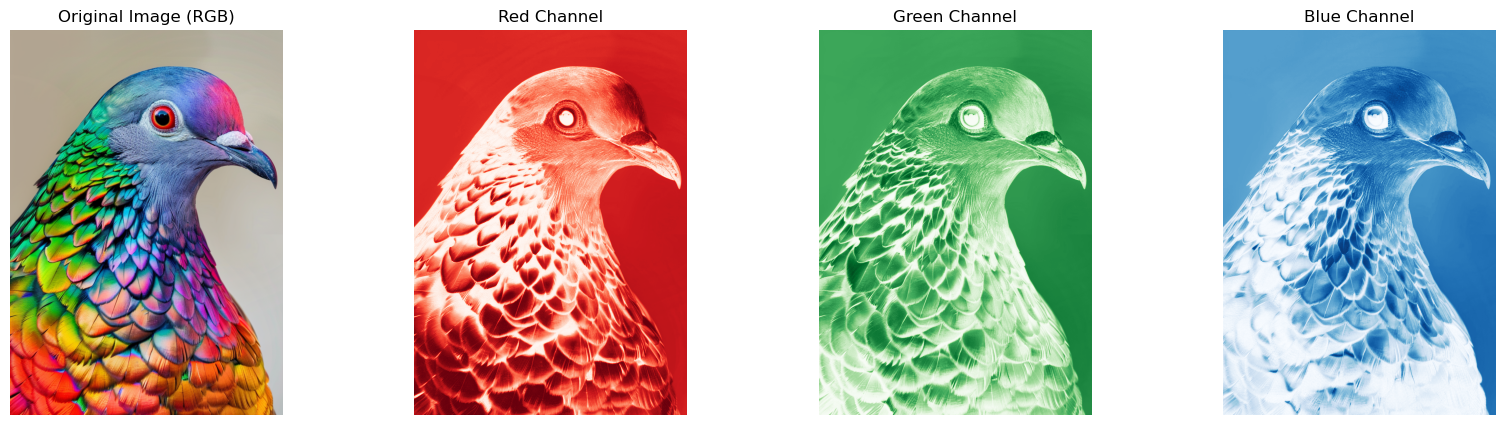

In [179]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os
from tempfile import TemporaryDirectory
import ipywidgets as widgets
from IPython.display import clear_output, display
from matplotlib.colors import LinearSegmentedColormap



def convert_image_mode(image, mode):
    """Convert the image to the specified mode."""
    if mode in ['1', 'L', 'P', 'RGB', 'RGBA', 'CMYK', 'YCbCr', 'LAB', 'HSV', 'I', 'F']:
        return image.convert(mode)
    else:
        raise ValueError(f"Unsupported mode: {mode}")

def save_temp_image(image, temp_dir, mode):
    """Save the image in a format that supports the mode."""
    ext = 'png'  # Default to PNG, as it supports most modes
    if mode in ['CMYK', 'LAB', 'I', 'F']:
        ext = 'tiff'  # TIFF supports these modes better
    
    if mode in ['HSV', 'YCbCr']:
        # Convert to RGB for saving, then convert back to the original mode for visualization
        image = image.convert('RGB')
        temp_image_path = os.path.join(temp_dir, f'temp_image.{ext}')
        image.save(temp_image_path, format=ext.upper())
        return temp_image_path, mode
    
    temp_image_path = os.path.join(temp_dir, f'temp_image.{ext}')
    image.save(temp_image_path, format=ext.upper())
    return temp_image_path, mode

def visualize_image_mode(image):
    mode = image.mode
    img_array = np.array(image)

    # ! Unsupported modes: '1', 'P'
    if mode in ['1', 'L', 'I', 'F']:
        fig, axs = plt.subplots(1, 3, figsize=(20, 5))

        # Display original image
        axs[0].imshow(image, cmap='gray')
        axs[0].set_title(f'Original Image ({mode})')
        axs[0].axis('off')

        # Display histogram
        axs[1].hist(img_array.ravel(), bins=256, color='black')
        axs[1].set_title('Histogram')
        axs[1].set_xlim(0, 255 if mode == 'L' else None)
        axs[1].set_yscale('log')  # Use log scale for better visualization

        # Display gradient
        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))
        axs[2].imshow(gradient, aspect='auto', cmap='gray')
        axs[2].set_title('Gradient')
        axs[2].axis('off')

        plt.tight_layout()
        plt.show()

    elif mode == 'P':
        fig, axs = plt.subplots(1, 2, figsize=(15, 5))

        # Display original image
        axs[0].imshow(image)
        axs[0].set_title(f'Original Image ({mode})')
        axs[0].axis('off')

        # Display palette
        palette = image.getpalette()
        palette_image = Image.new('P', (16, 16))
        palette_image.putpalette(palette)
        palette_image = palette_image.convert('RGB')
        axs[1].imshow(palette_image)
        axs[1].set_title('Color Palette')
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

    elif mode == 'RGB':
        r, g, b = image.split()
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        axs[0].imshow(image)
        axs[0].set_title('Original Image (RGB)')
        axs[1].imshow(r, cmap='Reds')
        axs[1].set_title('Red Channel')
        axs[2].imshow(g, cmap='Greens')
        axs[2].set_title('Green Channel')
        axs[3].imshow(b, cmap='Blues')
        axs[3].set_title('Blue Channel')
        for ax in axs:
            ax.axis('off')

    elif mode == 'RGBA':
        r, g, b, a = image.split()
        fig, axs = plt.subplots(1, 5, figsize=(25, 5))
        axs[0].imshow(image)
        axs[0].set_title('Original Image (RGBA)')
        axs[1].imshow(r, cmap='Reds')
        axs[1].set_title('Red Channel')
        axs[2].imshow(g, cmap='Greens')
        axs[2].set_title('Green Channel')
        axs[3].imshow(b, cmap='Blues')
        axs[3].set_title('Blue Channel')
        axs[4].imshow(a, cmap='gray')
        axs[4].set_title('Alpha Channel')
        for ax in axs:
            ax.axis('off')

    elif mode == 'CMYK':
        # Define a custom colormap for the yellow channel with a darker yellow
        darker_yellow = "#DAA520"  # Goldenrod, a darker shade of yellow
        yellow_cmap = LinearSegmentedColormap.from_list("custom_yellow", ["white", darker_yellow], N=256)

        c, m, y, k = image.split()
        fig, axs = plt.subplots(1, 5, figsize=(25, 5))
        axs[0].imshow(image.convert('RGB'))
        axs[0].set_title('Original Image (CMYK)')
        axs[1].imshow(c, cmap='Blues')
        axs[1].set_title('Cyan Channel')
        axs[2].imshow(m, cmap='Reds')
        axs[2].set_title('Magenta Channel')
        axs[3].imshow(y, cmap=yellow_cmap)  # Use the custom yellow colormap here
        axs[3].set_title('Yellow Channel')
        axs[4].imshow(k, cmap='gray')
        axs[4].set_title('Black Channel')
        for ax in axs:
            ax.axis('off')

    elif mode == 'YCbCr':
        y, cb, cr = image.split()
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        axs[0].imshow(image.convert('RGB'))
        axs[0].set_title('Original Image (YCbCr)')
        axs[1].imshow(y, cmap='gray')
        axs[1].set_title('Y Channel')
        axs[2].imshow(cb, cmap='Blues')
        axs[2].set_title('Cb Channel')
        axs[3].imshow(cr, cmap='Reds')
        axs[3].set_title('Cr Channel')
        for ax in axs:
            ax.axis('off')

    elif mode == 'LAB':
        l, a, b = image.split()
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        axs[0].imshow(image.convert('RGB'))
        axs[0].set_title('Original Image (LAB)')
        axs[1].imshow(l, cmap='gray')
        axs[1].set_title('L Channel')
        axs[2].imshow(a, cmap='gray')
        axs[2].set_title('A Channel')
        axs[3].imshow(b, cmap='gray')
        axs[3].set_title('B Channel')
        for ax in axs:
            ax.axis('off')

    elif mode == 'HSV':
        h, s, v = image.split()
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        axs[0].imshow(image.convert('RGB'))
        axs[0].set_title('Original Image (HSV)')
        axs[1].imshow(h, cmap='hsv')
        axs[1].set_title('Hue Channel')
        axs[2].imshow(s, cmap='gray')
        axs[2].set_title('Saturation Channel')
        axs[3].imshow(v, cmap='gray')
        axs[3].set_title('Value Channel')
        for ax in axs:
            ax.axis('off')

    elif mode == 'I':
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(np.array(image), cmap='gray')
        axs[0].set_title('Original Image (32-bit Integer)')
        axs[0].axis('off')

        # Display histogram
        axs[1].hist(np.array(image).ravel(), bins=256, color='black')
        axs[1].set_title('Histogram')
        axs[1].set_yscale('log')  # Use log scale for better visualization
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

    elif mode == 'F':
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(np.array(image), cmap='gray')
        axs[0].set_title('Original Image (32-bit Floating Point)')
        axs[0].axis('off')

        # Display histogram
        axs[1].hist(np.array(image).ravel(), bins=256, color='black')
        axs[1].set_title('Histogram')
        axs[1].set_yscale('log')  # Use log scale for better visualization
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

    else:
        fig, ax = plt.subplots()
        ax.text(0.5, 0.5, f'Visualization not available for {mode}', ha='center', va='center')
        ax.set_title('Color Mode Visualization')
        ax.axis('off')

def run_visualization(image_info, test_mode):
    image_path = image_info['Path']
    actual_mode = image_info['Color Mode']
    
    with TemporaryDirectory() as temp_dir:
        image = Image.open(image_path)
        
        # Convert to test mode if different from actual mode
        if test_mode != actual_mode:
            converted_image = convert_image_mode(image, test_mode)
        else:
            converted_image = image
        
        # Save the image in a format that supports the mode
        temp_image_path, mode_to_visualize = save_temp_image(converted_image, temp_dir, test_mode)
        
        # Re-open the saved image to ensure compatibility
        converted_image = Image.open(temp_image_path)
        
        # Convert back to the test mode for visualization if needed
        if mode_to_visualize in ['HSV', 'YCbCr']:
            converted_image = convert_image_mode(converted_image, mode_to_visualize)
        
        # Print converted image color mode
        print(f'Converted Image Mode: {converted_image.mode}')
        visualize_image_mode(converted_image)

def on_color_mode_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        test_mode = change['new']
        clear_output(wait=True)  # Clear previous output
        display(color_mode_dropdown)  # Display the dropdown again
        run_visualization(image_info, test_mode)

# Create a dropdown widget for color mode selection
color_mode_dropdown = widgets.Dropdown(
    # Todo: Add support for excluded modes: '1', 'P'
    options=['L', 'RGB', 'RGBA', 'CMYK', 'YCbCr', 'LAB', 'HSV', 'I', 'F'],
    value=image_info["Color Mode"],
    description='Color Mode:',
    disabled=False,
)

# Attach the callback function to the dropdown
color_mode_dropdown.observe(on_color_mode_change)

# Display the dropdown
display(color_mode_dropdown)

# Main usage: Run with actual mode
run_visualization(image_info, image_info["Color Mode"])

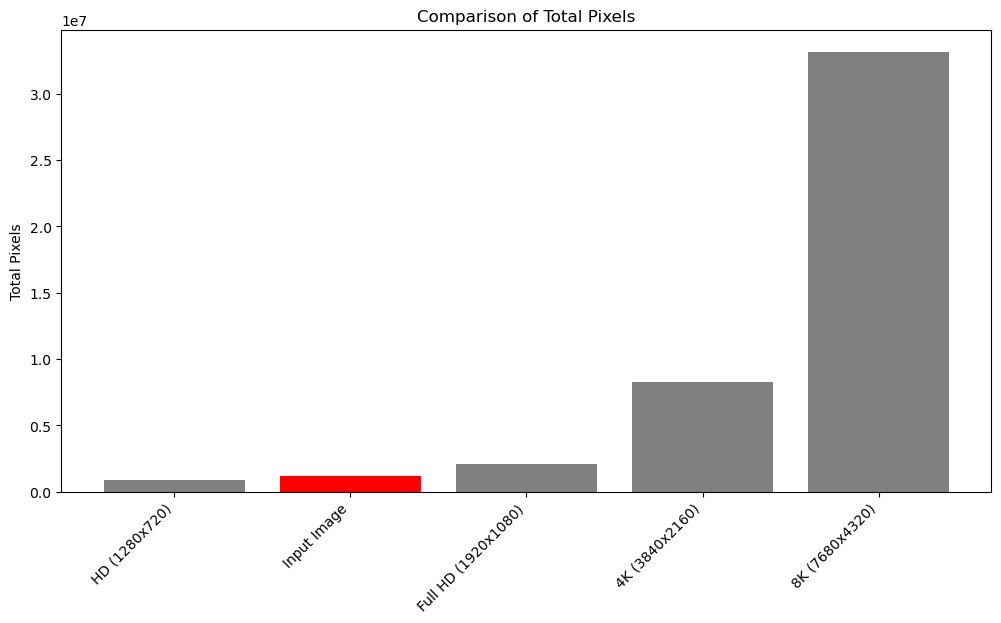

In [180]:
import matplotlib.pyplot as plt

def visualize_pixel_comparison(image_info):
    # Define example images with known resolutions
    example_images_info = [
        {'name': 'HD (1280x720)', 'total_pixels': 1280 * 720},
        {'name': 'Full HD (1920x1080)', 'total_pixels': 1920 * 1080},
        {'name': '4K (3840x2160)', 'total_pixels': 3840 * 2160},
        {'name': '8K (7680x4320)', 'total_pixels': 7680 * 4320}
    ]
    
    # Input image info
    input_image_info = {'name': 'Input Image', 'total_pixels': image_info['Total_Pixels']}
    
    # Combine and sort the images by total pixels
    all_images_info = [input_image_info] + example_images_info
    all_images_info.sort(key=lambda x: x['total_pixels'])
    
    # Prepare data for visualization
    labels = [info['name'] for info in all_images_info]
    total_pixels = [info['total_pixels'] for info in all_images_info]
    
    # Highlight the input image in a different color
    colors = ['red' if info['name'] == 'Input Image' else 'gray' for info in all_images_info]
    
    # Create the bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(labels, total_pixels, color=colors)
    ax.set_ylabel('Total Pixels')
    ax.set_title('Comparison of Total Pixels')
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    plt.show()

# Example usage
visualize_pixel_comparison(image_info)


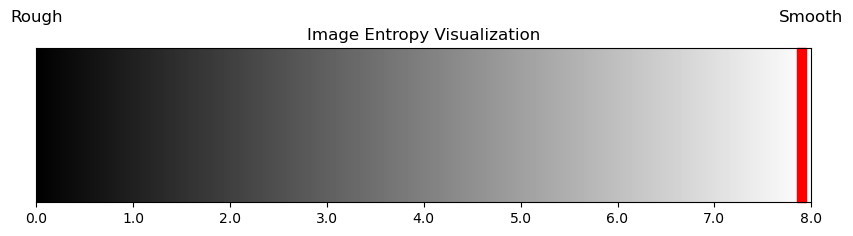

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def visualize_entropy_with_scale(entropy_value, max_entropy=8):
    """Visualize entropy value using a scale with rough to smooth texture."""
    fig, ax = plt.subplots(figsize=(10, 2))
    
    # Create a gradient bar from rough (left) to smooth (right)
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))
    
    # Display the gradient
    ax.imshow(gradient, aspect='auto', cmap='gray', extent=[0, max_entropy, 0, 1])
    
    # Add a red marker for the entropy value
    ax.add_patch(patches.Rectangle((entropy_value, 0), width=0.1, height=1, color='red', transform=ax.transData, clip_on=False))
    
    # Set the ticks and labels
    ax.set_xticks(np.arange(0, max_entropy + 1, 1))
    ax.set_xticklabels([f'{i:.1f}' for i in np.arange(0, max_entropy + 1, 1)])
    ax.set_yticks([])
    ax.set_title('Image Entropy Visualization')
    
    # Add labels for rough and smooth texture
    ax.text(0, 1.2, 'Rough', ha='center', va='center', fontsize=12, color='black')
    ax.text(max_entropy, 1.2, 'Smooth', ha='center', va='center', fontsize=12, color='black')
    
    plt.show()

# Example usage
entropy_value = 7.85
visualize_entropy_with_scale(entropy_value)
